## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0] # Number of rows in the dataset.

294478

c. The number of unique users in the dataset.

In [4]:
uni_us = df['user_id'].nunique() 
uni_us # Number of unique users in the dataset

290584

d. The proportion of users converted.

In [5]:
df_conv2 = ((df.groupby('user_id')['converted'].sum())>1).sum()
df_conv2 # Amount of users who converted more than once


64

In [6]:
df_conv1 = ((df.groupby('user_id')['converted'].sum())==1).sum()
df_conv1 # Amount of users who converted once

35109

In [7]:
df_conv = ((df.groupby('user_id')['converted'].sum())!=0).sum()
df_conv # Amount of users who converted 

35173

In [8]:
prop_conv = df_conv/uni_us
prop_conv # Proportion of users who converted at least once

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [9]:
df_a = df.query("group=='treatment' and landing_page!='new_page'").shape[0]
df_b = df.query("group!='treatment' and landing_page=='new_page'").shape[0]
df_a+df_b # Number of times that "new page" and "treatment" do not match.


3893

f. Do any of the rows have missing values?

In [10]:
no_match1 = (df.query("group=='treatment' and landing_page!='new_page'"))
no_match2 = (df.query("group!='treatment' and landing_page=='new_page'"))

In [11]:
frames = [no_match1,no_match2]
result = pd.concat(frames)
result
result.info() # There is no missing value, all of the values are "non-null".

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 308 to 294331
Data columns (total 5 columns):
user_id         3893 non-null int64
timestamp       3893 non-null object
group           3893 non-null object
landing_page    3893 non-null object
converted       3893 non-null int64
dtypes: int64(2), object(3)
memory usage: 182.5+ KB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df_c = (df.query("group=='control' and landing_page!='old_page'"))
df_d = (df.query("group!='control' and landing_page=='old_page'"))
(df_c==df_a).head()
(df_d==df_b).head()


,user_id,timestamp,group,landing_page,converted
308,False,False,False,False,False
327,False,False,False,False,False
357,False,False,False,False,False
685,False,False,False,False,False
713,False,False,False,False,False


In [13]:
df2=pd.concat([df, no_match1, no_match2]).drop_duplicates(keep=False)
df2.shape

(290585, 5)

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
uni_us2 = df2['user_id'].nunique()
uni_us2 # Amount of "user_id"s in "df2"

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df_rep= df2['user_id'].value_counts()
df_rep.head() # Show the counted values of each user id

773192    2
630732    1
811737    1
797392    1
795345    1
Name: user_id, dtype: int64

In [17]:
df2[df2['user_id']==773192] # Show all repeated "user_id"s

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['user_id']==773192] # Show the row information for the repeated user

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2 = df2[df2.index != 1899] # Remove one row for the repeated user
df2.shape # Check if one row deleted

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
prob_convert = df2['converted'].sum()/len(df2)
prob_convert # Probability of an individual converting regardless of the received page

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
tot_control = df2.query("group=='control'").shape[0] # total amount in the control group
tot_control 

145274

In [22]:
cont_conv = df2.query("group=='control' and converted=='1'").shape[0] # amount of control that converted
cont_conv

17489

In [23]:
prob_cont_conv = cont_conv/tot_control
prob_cont_conv # Probability of an individual converting if belongs to the "control" group

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
tot_treat = df2.query("group=='treatment'").shape[0] # total amount in the control group
tot_treat 

145310

In [25]:
treat_conv = df2.query("group=='treatment' and converted=='1'").shape[0] # amount of control that converted
treat_conv

17264

In [26]:
prob_treat_conv = treat_conv/tot_treat
prob_treat_conv # Probability of an individual converting if belongs to the "treatment" group

0.11880806551510564

d. What is the probability that an individual received the new page?

In [27]:
prob_newpage = (df2.query("landing_page == 'new_page'")).shape[0]/len(df2)
prob_newpage # Probaility that an individual receives the new page


0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**We can not conclude that the new treatment page leads to more conversions, as the conversion rate for this is 11.88% and for the old one is 12.03%. Furthermore the probability for an individual to receive the new page is 50%, so the the conversion rate is measured for an equal landing amount of individuals for each group.** 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$** :         **$p_{old}$** >= **$p_{new}$**


**$H_{1}$** :         **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [28]:
crpnew = (df2.query('converted=="1" ').user_id.nunique())/(df2['user_id'].nunique())
crpnew  # Conversion rate for pnew under the null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [29]:
crpold = (df2.query('converted=="1" ').user_id.nunique())/(df2['user_id'].nunique())
crpold # Conversion rate for pold under the null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [30]:
indiv_treat =  df2[df2['group']=="treatment"]
indiv_treat.shape[0] # Number of individuals in the 'treatment' group.

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [31]:
indiv_contr = df2[df2['group']=="control"]
indiv_contr.shape[0] # Number of individuals in the 'control' group.

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
new_page_converted = np.random.choice([0,1], size = indiv_treat.shape[0], p = [1-crpnew,crpnew] )
new_page_converted

array([0, 0, 1, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
old_page_converted = np.random.choice([0,1], size = indiv_contr.shape[0], p = [1-crpold,crpold] )
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
p_diff_g = new_page_converted.mean() - old_page_converted.mean() # 'pnew' - 'pold' for the simulated values from parts 'e' and 'f'
p_diff_g

0.00096153472374951865

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [35]:
p_diffs = []

for i in range(10000):
    old_page_converted = np.random.choice([0,1], size = indiv_contr.shape[0], p = [1-crpold,crpold] )
    new_page_converted = np.random.choice([0,1], size = indiv_treat.shape[0], p = [1-crpnew,crpnew] )
    p_differ = old_page_converted.mean() - new_page_converted.mean()
    p_diffs.append(p_differ)
    

In [36]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

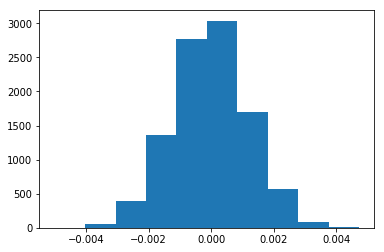

In [37]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
obs_diff = prob_treat_conv - prob_cont_conv # difference of probability to convert given a group, being these 'control' ant 'treatment'
p_value = (p_diffs>obs_diff).mean() # p-value calculation
p_value

0.90000000000000002

In [39]:
p_value<0.05

False

**The *p_value* is greater than the level of *Type I* errors, which is the 5%.**

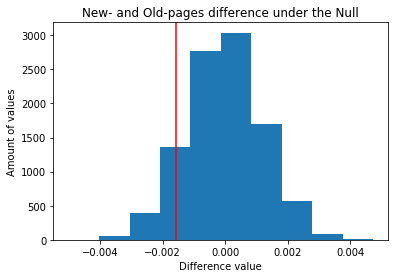

In [40]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');
plt.title('New- and Old-pages difference under the Null')
plt.xlabel('Difference value');
plt.ylabel('Amount of values');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The *p-value* calculation indicates wether the Null Hypohtesis is likely to be rejected or not. In our case, as it is bigger than the Type I error, $p-{value}$** **>0.05, we will not reject the Null Hypothesis ($H_{0}$** :         **$p_{old}$** >= **$p_{new}$).**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df:stats.chi2.sf(chisq,df)

convert_old = df2.query('converted=="1" and landing_page=="old_page"').shape[0]
convert_new = df2.query('converted=="1" and landing_page=="new_page"').shape[0]
n_old = (df2.query('group=="control"')).shape[0]
n_new = (df2.query('group=="treatment"')).shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [42]:
convert_old,convert_new

(17489, 17264)

In [43]:
n_old,n_new

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [44]:
 from statsmodels.stats.proportion import proportions_ztest

In [45]:
proportions_ztest([convert_old,convert_new],[n_old,n_new], alternative='smaller')

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The calculated values in the previous question indicate that we can not reject the Null. The p-value=0.9>0.05, so we can not say with a 95% of confidence that the Alternative is true, so is not possible to afirm that the conversion rate of the new page is bigger than the one of the old page, as assumed in 'j' and 'k'.**


**Regarding the z-value, we can determine that, as with the p-value, we can not reject the Null, because for a confidence interval of 95% the z-value should be greater than 1,31 in absolute values.**



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**There are just two possible outputs (converted or not converted) for the dependant varible, so we would use a Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [46]:
df2['intercept']=1 
df2[['treatment','ab_group']]=pd.get_dummies(df2['group'])
df2=df2.drop('treatment',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_group
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [47]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_group']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        18:26:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_group      -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The *p-value* associated with *ab_page* is 0.19. This is associated with the comparative of the conversions for each group ('control' and 'treatment'). We are testing, through a logical regression, if the conversion rates are equal. For the Null, we assume that the conversion rates are equal and for the Alternative we assume that these are not equal (two-tailed test).**

**For the hypotheses in Part II, we checked the conversion rates for the 'new_page' and the 'old_page', the landing pages, where the hypotheses were the following (one-tailed test):**

**$H_{0}$** :         **$p_{old}$** >= **$p_{new}$**

**$H_{1}$** :         **$p_{old}$** < **$p_{new}$**





f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Mainly, adding other factors in our regression model could provide us additional information about days, times of the day or other variables in which a conversion happens. On the other hand, the more factors in our regression model, the more complex it becomes.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [49]:
df_country = pd.read_csv('countries.csv')
df_country.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [50]:
df3 = pd.merge(df2,df_country,on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_group,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [51]:
diff_country = df3['country'].unique()
diff_country

array(['US', 'CA', 'UK'], dtype=object)

In [52]:
df3[['CA','US','UK']] = pd.get_dummies(df3['country'])
df3 = df3.drop('UK',axis=1)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_group,country,CA,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0


In [53]:
logit_mod_3 = sm.Logit(df3['converted'], df3[['intercept','ab_group','CA','US']])
results3 = logit_mod_3.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [54]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        18:26:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_group      -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**By adding the countries to the logistic regression we can see that the p-value of ab_group has increased 0.001, so the country has an influence in the previous analysis of the conversion but it is not still statistically significant. In addition, the p-values of US and CA are, like all the rest, greater than 0.05, so we can afirm that the influence of the landing page in the US and Canada is not different to the other countries.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
df3['US_ab_group'] = df3['ab_group']*df3['US']

In [56]:
df3['CA_ab_group'] = df3['ab_group']*df3['CA']
df3.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_group,country,CA,US,US_ab_group,CA_ab_group
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,0


In [57]:
df3['intercept'] = 1
logit_mod_4 = sm.Logit(df3['converted'], df3[['intercept','ab_group','CA','US','CA_ab_group','US_ab_group']])
results4 = logit_mod_4.fit()
results4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:               3.482e-05
Time:                        18:26:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_group       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA             -0.0175      0.038     -0.465      0.642      -0.091       0.056
US             -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_group    -0.0469      0.054     -0.872      0.383      -0.152       0.059
US_ab_group     0.0314      0.027      1.181      0.238      -0.021       0.084
===============================================================================
"""

**Adding the interaction of the country with the page, we can see that both coefficients and p-values change but these continue indicating that we can not reject the null hypothesis, so, as there is no evidence that the new page would bring more conversions and additionally it would have an econonomic cost, implementing the new page would not be profitable and, hence, not recommendable.**

<a id='conclusions'></a>



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0